In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [19]:
# img = cv2.imread("blob_cone.jpg")
img = cv2.imread("blob_cone.jpg")

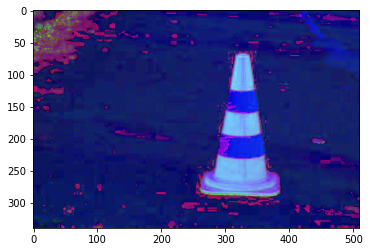

In [21]:
img_HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_HSV)
plt.show()

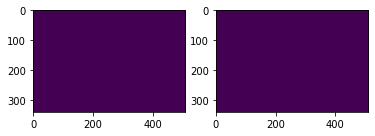

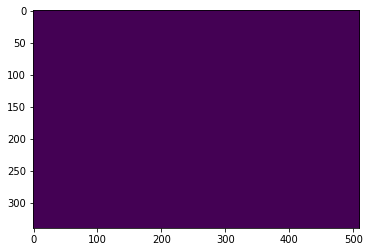

In [22]:
img_thresh_low = cv2.inRange(img_HSV, np.array([0, 135, 135]), np.array([15, 255, 255]))
img_thresh_high = cv2.inRange(img_HSV, np.array([159, 135, 135]), np.array([179, 255, 255]))
img_thresh = cv2.bitwise_or(img_thresh_low, img_thresh_high)

f, axarr = plt.subplots(nrows=1, ncols=2)
axarr[0].imshow(img_thresh_low)
axarr[1].imshow(img_thresh_high)
plt.show()

plt.imshow(img_thresh)
plt.show()

In [23]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# lower bound and upper bound for Green color

greenBGR = np.uint8([[[0,165,255]]])

hsv_green = cv2.cvtColor(greenBGR,cv2.COLOR_BGR2HSV)
print (hsv_green)
mask = cv2.inRange(hsv,(0, 100, 20), (25, 200, 255))

kernel = np.ones((5, 5))

# # erode and then dilate
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# blur
mask = cv2.medianBlur(mask, 5)

# mask = cv2.Canny(mask, 80, 160)


result = img.copy()
contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    # print(y-x)
    if np.abs(y-x) > 2 and np.abs(h-w) > 2:
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
        print("x,y,w,h:",x,y,w,h)


cv2.imshow("Keypoints", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[ 19 255 255]]]
x,y,w,h: 351 286 13 4
x,y,w,h: 262 280 11 6
x,y,w,h: 267 226 99 63
x,y,w,h: 294 158 60 39
x,y,w,h: 310 100 4 8
x,y,w,h: 310 69 34 57


In [28]:
boxes = []
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    if np.abs(y-x) > 2 and np.abs(h-w) > 2:
        boxes.append([x,y, x+w,y+h])

result = img.copy()
boxes = np.asarray(boxes)
left, top = np.min(boxes, axis=0)[:2]
right, bottom = np.max(boxes, axis=0)[2:]

cv2.rectangle(result, (left,top), (right,bottom), (255, 0, 0), 2)
    
    

cv2.imshow("Keypoints", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(10, 100, 20), (25, 255, 255) )
cv2.imshow("orange", mask);cv2.waitKey();cv2.destroyAllWindows()

In [ ]:
# Setup SimpleBlobDetector parameters.
# params = cv2.SimpleBlobDetector_Params()
# # Change thresholds
# params.minThreshold = 10;
# params.maxThreshold = 200;
# # # Filter by Area.
# # params.filterByArea = True
# # params.minArea = 1500
# # # Filter by Circularity
# # params.filterByCircularity = True
# # params.minCircularity = 0.1
# # # Filter by Convexity
# # params.filterByConvexity = True
# # params.minConvexity = 0.87

# # # Filter by Inertia
# # params.filterByInertia = True
# # params.minInertiaRatio = 0.01
# # Create a detector with the parameters
# ver = (cv2.__version__).split('.')
# if int(ver[0]) < 3 :
#     detector = cv2.SimpleBlobDetector(params)
# else :
#     detector = cv2.SimpleBlobDetector_create(params)


In [ ]:
# keypoints = detector.detect(im)

# kpt_image = cv2.drawKeypoints(im, keypoints, np.array([]), (0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv2.imshow("Keypoints", kpt_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()